<a href="https://colab.research.google.com/github/sagsshakya/Machine-Learning/blob/master/Stacked%20Generalization/Stacking_Ensemble_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacked Generalization.
    Prepared by: Sagun Shakya
    Date: 02/12/2020
    EmailID: sags.shakya@gmail.com
    Institutional emailID: 121922502019@gitam.in



### Importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from warnings import filterwarnings
filterwarnings('ignore')

### Generating the dataset for classification.

In [ ]:
X,Y = make_classification(n_samples=700,
                    n_features = 6,
                    n_informative = 6,
                    n_redundant = 0,
                    n_repeated = 0,
                    n_classes = 2,
                    class_sep = 1.5,
                    flip_y = 0,
                    random_state = 100,
                    )

In [ ]:
# Number of columns.
num_features = X.shape[1]

# Naming the columns using alphabets.
import string
feature_names = list(string.ascii_uppercase[:num_features])

# Converting to DataFrame.
X = pd.DataFrame(X, columns = feature_names)
Y = pd.Series(Y)
X.head()

,A,B,C,D,E,F
0,-2.791395,0.938447,-1.675554,-2.370439,2.169265,-0.705193
1,0.258198,4.285714,-0.780059,1.015847,2.623787,2.503209
2,-3.312841,3.706072,-2.330852,-0.493764,-0.994420,-1.166961
3,-0.419635,3.562837,-0.171135,1.129520,3.008636,2.688993
4,1.789513,-0.480414,0.354873,2.388987,-0.401013,-1.410247


In [ ]:
# Dimensions of the dependent and independent variables.
print('Dimension of X: ',X.shape)
print('Dimension of Y: ',Y.shape)

Dimension of X:  (700, 6)
Dimension of Y:  (700,)


### Data Exploration.

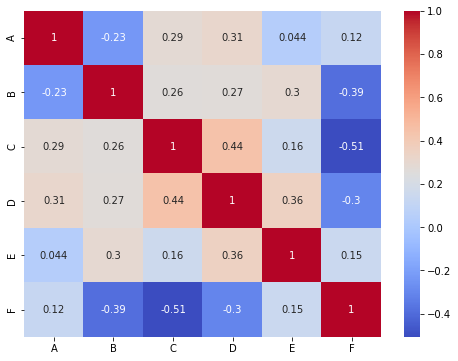

In [ ]:
# Checking for multi - colinearity.
plt.figure(figsize = (8,6))
sns.heatmap(X.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [ ]:
# Distribution of the target feature.
Y.value_counts(normalize = True)

1    0.5
0    0.5
dtype: float64

<Figure size 648x648 with 0 Axes>

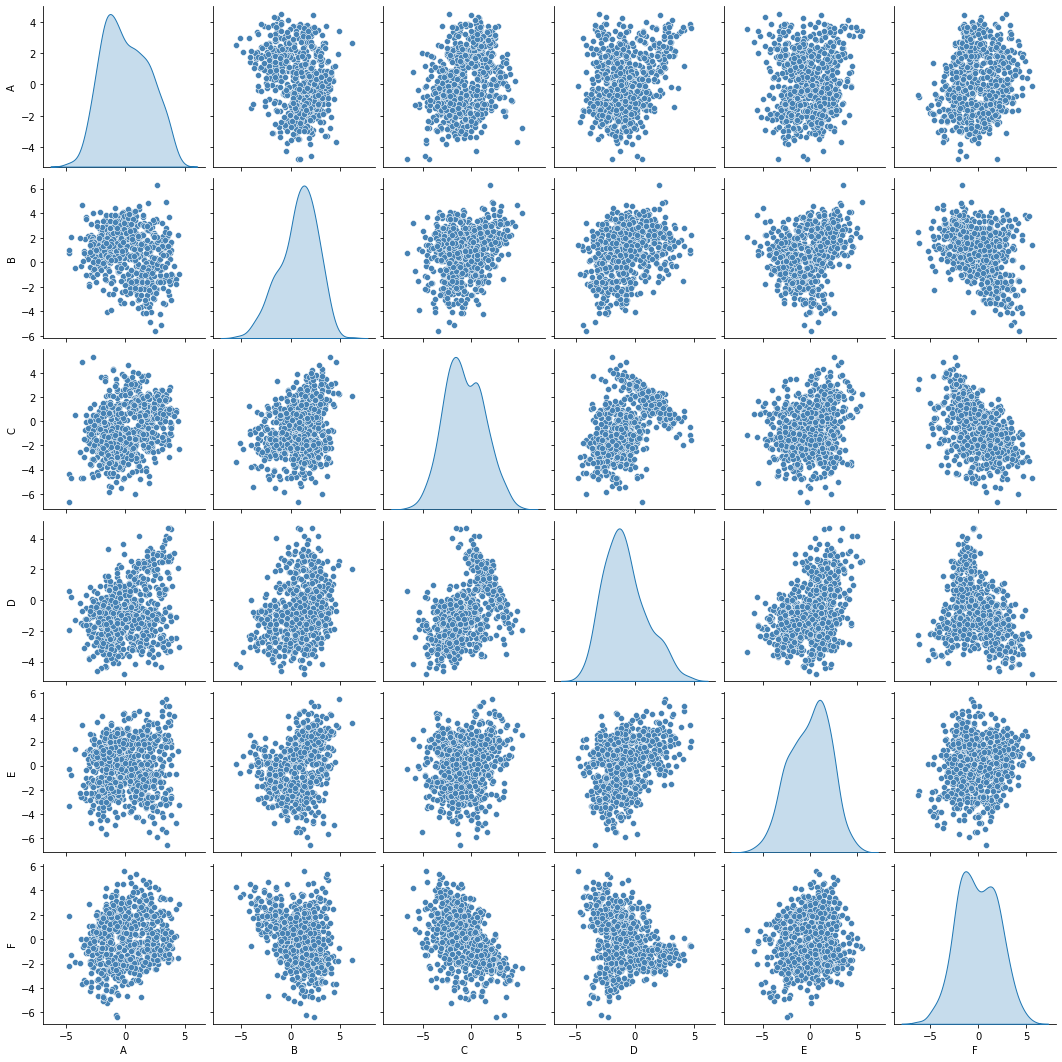

In [ ]:
# General view of the data points using pairplot and KDE plots.
plt.figure(figsize = (9,9))
sns.pairplot(X, diag_kind='kde', plot_kws = {'color' : 'steelblue'})
plt.show()

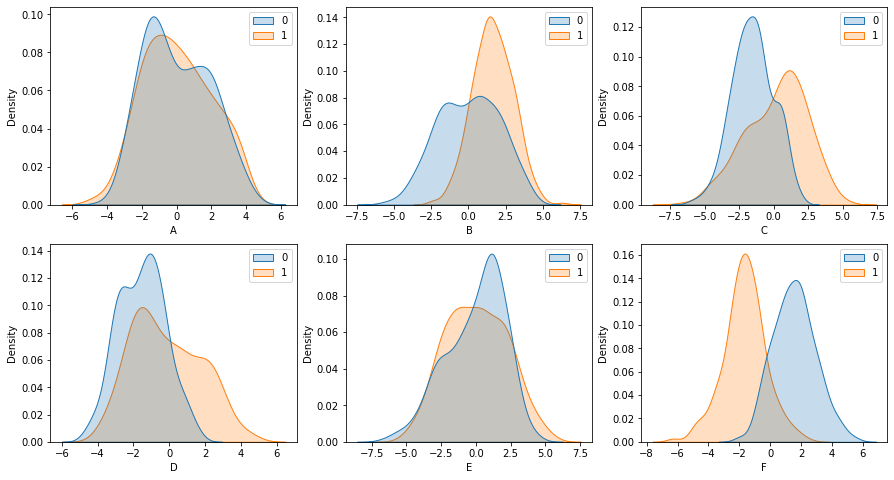

In [ ]:
# KDE Plots of each feature when separated on the basis of target.  
plt.figure(figsize = (15,8))

for ii,cols in enumerate(X.columns.values, 1):
    plt.subplot(2,3,ii)
    sns.kdeplot(X[cols], color = 'steelblue', hue = Y.values, shade = True)
plt.show()

In [ ]:
# Basic statistical description of the numeric data.
X.describe()

,A,B,C,D,E,F
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.033899,0.808248,-0.667166,-0.855151,-0.006234,-0.051849
std,1.929243,1.910410,2.075739,1.795393,2.151634,2.116860
min,-4.781864,-5.576575,-6.701779,-4.788343,-6.599844,-6.343592
25%,-1.512556,-0.391882,-2.215112,-2.212081,-1.593580,-1.663632
50%,-0.188793,1.064555,-0.859390,-1.101140,0.165144,-0.139776
75%,1.559788,2.201340,0.809369,0.205287,1.577101,1.626243
max,4.511962,6.282007,5.370179,4.683708,5.501250,5.601047


# Applying various classification algorithms. 

In [ ]:
# Train - test split.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state = 100)

X_train.shape, X_test.shape

((560, 6), (140, 6))

In [ ]:
# Designing a general function to carry out the classification task and display the
# performance metrics as well.

def show_classification_metrics(Y_true, Y_pred):
    '''
    This function displays the accuracy score, f1 - score and the ROC_AUC score
    for given classification predictions and the true labels.
    '''
    print('Accuracy Score = ', round(accuracy_score(Y_true, Y_pred), 3))
    print('F1 - Score = ', round(f1_score(Y_true, Y_pred), 3))
    print('ROC - AUC Score = ', round(roc_auc_score(Y_true, Y_pred), 3))
    return


def do_classification(model,
                      X_train = X_train, X_test = X_test,
                      Y_train = Y_train, Y_test = Y_test,
                      show_classification_metric = True,
                      return_predictions = False):
    
    '''

    This function fits the given classification model to the training data and 
    makes predictions for training as well as testing data sets. Finally, it 
    outputs the classification report based on the 'show_classification_metrics' 
    function for both training and testing data.

    Parameters:
    model -- the classification model used.
    show_classification_metric -- If True, it shows output of the 
                                'show_classification_metrics' function.
    return_predictions -- If True, returns a ND - array of training and testing predictions.

    '''
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    if show_classification_metric:
        print('For Training set:')
        show_classification_metrics(Y_train, train_pred)

        print()
        
        print('For Testing Set:')
        show_classification_metrics(Y_test, test_pred)

    if return_predictions:
        return train_pred, test_pred 

## 1. Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1, random_state=100, penalty = 'none')
do_classification(model = log_reg)

For Training set:
Accuracy Score =  0.888
F1 - Score =  0.884
ROC - AUC Score =  0.887

For Testing Set:
Accuracy Score =  0.921
F1 - Score =  0.927
ROC - AUC Score =  0.925


## 2. Naive Bayes Classification.

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
do_classification(model = NB)

For Training set:
Accuracy Score =  0.886
F1 - Score =  0.882
ROC - AUC Score =  0.886

For Testing Set:
Accuracy Score =  0.893
F1 - Score =  0.898
ROC - AUC Score =  0.899


## 3. Random Forest Classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, max_depth=4, min_samples_leaf=5, random_state=100)
do_classification(model = random_forest)

For Training set:
Accuracy Score =  0.927
F1 - Score =  0.922
ROC - AUC Score =  0.926

For Testing Set:
Accuracy Score =  0.907
F1 - Score =  0.912
ROC - AUC Score =  0.913


## 4. XGBoost Classifier.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 3,  n_estimators=100,
                    subsample = .6,
                    colsample_bylevel=.77,
                    min_child_weight=7,
                    learning_rate=.1, random_state = 100)
do_classification(model = xgb)

For Training set:
Accuracy Score =  0.946
F1 - Score =  0.944
ROC - AUC Score =  0.946

For Testing Set:
Accuracy Score =  0.929
F1 - Score =  0.933
ROC - AUC Score =  0.933


# Stacking.

The stacking function takes several inputs:

    models: the first level models we defined earlier
    X_train, y_train, X_test: our data
    regression: Boolean indicating whether we want to use the function for regression.
    mode: using the earlier describe out-of-fold during cross-validation
    needs_proba: Boolean indicating whether you need the probabilities of class labels
    save_dir: save the result to directory Boolean
    metric: what evaluation metric to use (we imported the accuracy_score in the beginning)
    n_folds: how many folds to use for cross-validation
    stratified: whether to use stratified cross-validation
    shuffle: whether to shuffle the data
    random_state: setting a random state for reproducibility
    verbose: 2 here refers to printing all info

### To do the final prediction, we test these two models separately: 

A. Using XGBoost Classifier as the final (meta) model.

In [ ]:
from mlxtend.classifier import StackingCVClassifier

# Putting the baseline models in a list.
# These models will help to make the first level predictions.

baseline_models = [log_reg, NB, random_forest, xgb]

# The prediction from the level 0 is fed into the meta - level classifier,
# which, in our case, is the XGBoost Classifier. This will help to make the final predictions.

final_model = XGBClassifier(random_state = 100, learning_rate = 0.1,
                            n_estimators = 150,
                            max_depth = 4,
                            subsample = .8,
                            colsample_bylevel =.77,
                            min_child_weight = 6
                            )

# Defining the stack model.
stackmodel= StackingCVClassifier(classifiers = baseline_models,
                             meta_classifier = final_model,
                             cv = 4,
                             use_probas=False,
                             stratify = False,  
                             use_features_in_secondary=True, 
                             verbose=-2)

# Getting the performance metrics of the stacking model.
train_pred, test_pred = do_classification(stackmodel,
                  X_train.values, X_test.values,
                  Y_train.values, Y_test.values,
                  return_predictions = True)

For Training set:
Accuracy Score =  0.982
F1 - Score =  0.981
ROC - AUC Score =  0.982

For Testing Set:
Accuracy Score =  0.95
F1 - Score =  0.955
ROC - AUC Score =  0.95


Creating a confusion matrix for Case A.

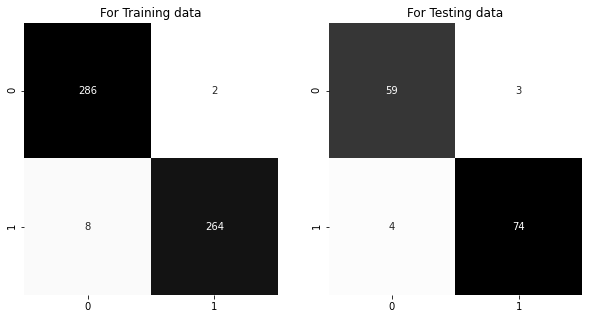

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_train, train_pred),
            annot = True, fmt = '.5g', cmap = 'binary', cbar = False)
plt.title('For Training data')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test, test_pred),
            annot = True, fmt = '.5g', cmap = 'binary', cbar = False)
plt.title('For Testing data')

plt.show()

B. Using Support Vector Classifier as the final (meta) model.

In [ ]:
from mlxtend.classifier import StackingCVClassifier

# Putting the baseline models in a list.
# These models will help to make the first level predictions.

baseline_models = [log_reg, NB, random_forest, xgb]

# We use Support Vector Machine Classifier to check if we can
# improve the performance of our Stacking model.

final_model = SVC()

# Defining the stack model.
stackmodel= StackingCVClassifier(classifiers = baseline_models,
                             meta_classifier = final_model,
                             cv = 3,
                             use_probas=False, 
                             use_features_in_secondary=True, 
                             verbose=-2)

# Getting the performance metrics of the stacking model.
train_pred, test_pred = do_classification(stackmodel,
                  X_train.values, X_test.values,
                  Y_train.values, Y_test.values,
                  return_predictions = True)

For Training set:
Accuracy Score =  0.98
F1 - Score =  0.98
ROC - AUC Score =  0.98

For Testing Set:
Accuracy Score =  0.964
F1 - Score =  0.967
ROC - AUC Score =  0.966


Creating a confusion matrix for case B.

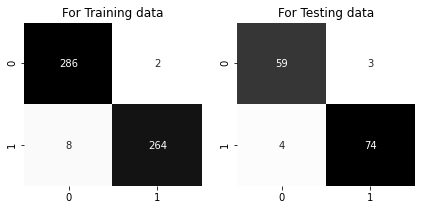

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (7,3))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_train, train_pred),
            annot = True, fmt = '.5g', cmap = 'binary', cbar = False)
plt.title('For Training data')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test, test_pred),
            annot = True, fmt = '.5g', cmap = 'binary', cbar = False)
plt.title('For Testing data')

plt.show()

It is to be noted that even though Stacked Generalization helps to improve performance, there might be some models in the base that might produce similar kind of results or, in some cases, actually outperform it. In such cases, it is advised to use such single model for the sake of complexity of the problem solution.

In [ ]:
from sklearn.svm import SVC
svc = SVC()
do_classification(svc)

For Training set:
Accuracy Score =  0.982
F1 - Score =  0.981
ROC - AUC Score =  0.982

For Testing Set:
Accuracy Score =  0.979
F1 - Score =  0.98
ROC - AUC Score =  0.981
